In [14]:
#Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
# Read in the produce dataset and drop the column of index from the previous table (no longer valid indices)
organic = pd.read_csv('produce_dataset.csv').drop('Unnamed: 0', axis =1)

# Initialize a total_produce_purchased column with all 1's 
organic['total_produce_purchased'] = 1

# Create a organic? column containing 1 for an organic produce, 0 for a non-organic produce
organic['organic?'] = organic['product_name'].str.contains('Organic').astype(int)

In [16]:
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased,organic?
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0


### QUESTION 3
Is "buying organic" a stable or dynamic behavior?

In [64]:
# Create series data for produce per order and organic produce per order

produce_per_order = organic.groupby(['user_id', 'order_number', 'order_id'])['total_produce_purchased'].sum()
organic_per_order = organic.groupby(['user_id', 'order_number', 'order_id'])['organic?'].sum()

In [65]:
produce_per_order

user_id  order_number  order_id
1        2             2398795     1
         5             431534      4
2        1             2168274     4
         2             1501582     2
         3             1901567     1
                                  ..
206209   10            2266710     1
         11            1854736     1
         12            626363      5
         13            2977660     1
         14            272231      1
Name: total_produce_purchased, Length: 2506247, dtype: int64

In [66]:
organic_per_order

user_id  order_number  order_id
1        2             2398795     1
         5             431534      2
2        1             2168274     3
         2             1501582     1
         3             1901567     1
                                  ..
206209   10            2266710     0
         11            1854736     0
         12            626363      1
         13            2977660     0
         14            272231      0
Name: organic?, Length: 2506247, dtype: int64

In [67]:
# Combine the series into a new dataset called user_behavior
user_behavior = pd.concat([produce_per_order, organic_per_order], axis=1).reset_index()

# Rename the organic? column
user_behavior.rename(columns = {'organic?':'organic_produce_purchased'}, inplace = True) 
user_behavior

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased
0,1,2,2398795,1,1
1,1,5,431534,4,2
2,2,1,2168274,4,3
3,2,2,1501582,2,1
4,2,3,1901567,1,1
...,...,...,...,...,...
2506242,206209,10,2266710,1,0
2506243,206209,11,1854736,1,0
2506244,206209,12,626363,5,1
2506245,206209,13,2977660,1,0


In [68]:
# Create a new column of total order count for a user
user_behavior['order_count'] = user_behavior.groupby('user_id').user_id.transform('count')
user_behavior.head(30)

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
0,1,2,2398795,1,1,2
1,1,5,431534,4,2,2
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
7,2,6,1199898,5,2,15
8,2,7,3194192,4,1,15
9,2,8,788338,3,1,15


count    194331.000000
mean         12.896795
std          14.421578
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         100.000000
Name: order_count, dtype: float64

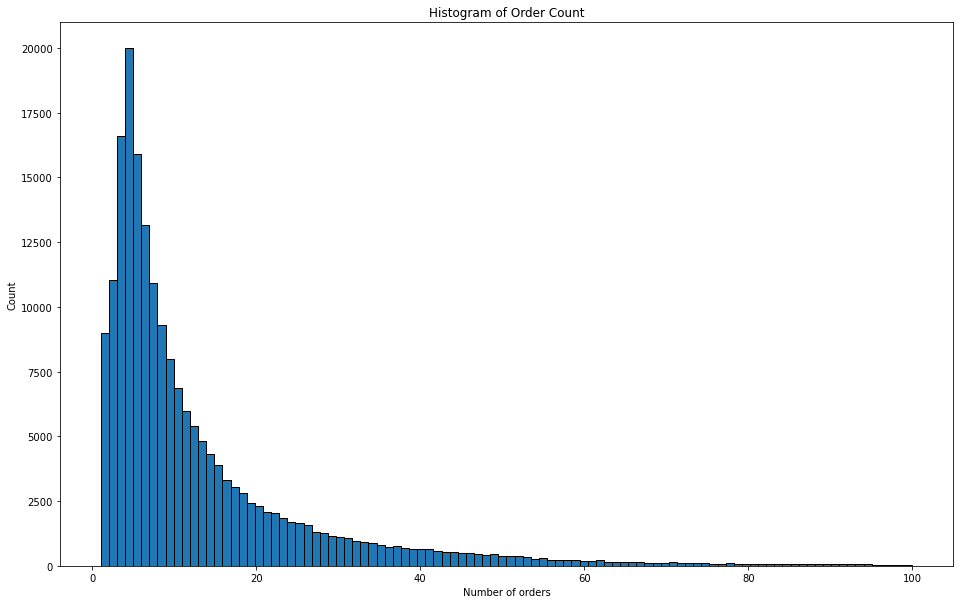

In [69]:
# Plot the count of users who had x number of orders

plt.figure(figsize=(16,10))

plt.hist(user_behavior.drop_duplicates(subset=['user_id'])['order_count'], bins = 100, edgecolor = 'black')

plt.title('Histogram of Order Count')
plt.xlabel('Number of orders')
plt.ylabel('Count')
pass

# Describe the stats of the order_count
user_behavior.drop_duplicates(subset=['user_id'])['order_count'].describe()

In [107]:
# Drop the users who had less than 10 orders
user_behavior10 = user_behavior.drop(user_behavior[user_behavior['order_count'] < 10].index, axis=0)
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
...,...,...,...,...,...,...
2506242,206209,10,2266710,1,0,11
2506243,206209,11,1854736,1,0,11
2506244,206209,12,626363,5,1,11
2506245,206209,13,2977660,1,0,11


In [108]:
# Re-assign the order_number column to be sequential from 1 to number of orders per user
user_behavior10['order_number'] = user_behavior10.groupby('user_id').cumcount() + 1
user_behavior10.head(30)

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
7,2,6,1199898,5,2,15
8,2,7,3194192,4,1,15
9,2,8,788338,3,1,15
10,2,9,1718559,2,0,15
11,2,10,1447487,2,1,15


In [109]:
# Check to make sure each first order number is 1
user_behavior10.drop_duplicates(subset=['user_id'])

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
2,2,1,2168274,4,3,15
17,3,1,1374495,6,2,12
38,7,1,2565571,2,1,20
92,14,1,2906263,1,0,14
112,17,1,1681401,1,0,14
...,...,...,...,...,...,...
2506133,206202,1,2554068,7,2,18
2506164,206206,1,1685630,14,13,11
2506175,206207,1,2166133,6,5,16
2506191,206208,1,2227043,5,4,45


In [110]:
# Create a new 'organic_%' column that is the percentage of organic produce purchased over total produce purchased

user_behavior10['organic_%'] = user_behavior10['organic_produce_purchased']/user_behavior10['total_produce_purchased']
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%
2,2,1,2168274,4,3,15,0.750000
3,2,2,1501582,2,1,15,0.500000
4,2,3,1901567,1,1,15,1.000000
5,2,4,738281,3,2,15,0.666667
6,2,5,1673511,1,1,15,1.000000
...,...,...,...,...,...,...,...
2506242,206209,7,2266710,1,0,11,0.000000
2506243,206209,8,1854736,1,0,11,0.000000
2506244,206209,9,626363,5,1,11,0.200000
2506245,206209,10,2977660,1,0,11,0.000000


In [111]:
# Create a dataframe with the simple moving average over 5 rows per user
df_SMA = user_behavior10.groupby('user_id')['organic_%'].rolling(window=5).mean().reset_index(level=[0,1])
df_SMA.set_index('level_1', inplace=True)
df_SMA.rename(columns = {'organic_%':'organic_%_SMA5'}, inplace = True) 
df_SMA.drop('user_id', axis=1, inplace=True)
df_SMA

,organic_%_SMA5
level_1,
2,NaN
3,NaN
4,NaN
5,NaN
6,0.783333
...,...
2506242,0.733333
2506243,0.533333
2506244,0.440000


In [112]:
# Create a dataframe with the culmulative moving average starting from row 5 per user
df_CMA = user_behavior10.groupby('user_id')['organic_%'].expanding(min_periods=5).mean().reset_index(level=[0,1])
df_CMA.set_index('level_1', inplace=True)
df_CMA.rename(columns = {'organic_%':'organic_%_CMA5'}, inplace = True) 
df_CMA.drop('user_id', axis=1, inplace=True)
df_CMA

,organic_%_CMA5
level_1,
2,NaN
3,NaN
4,NaN
5,NaN
6,0.783333
...,...
2506242,0.666667
2506243,0.583333
2506244,0.540741


In [113]:
# Join the SMA and CMA dataframes to the original dataframe

user_behavior10 = user_behavior10.join(df_SMA)
user_behavior10 = user_behavior10.join(df_CMA)

In [114]:
user_behavior10.head(30)

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%,organic_%_SMA5,organic_%_CMA5
2,2,1,2168274,4,3,15,0.750000,NaN,NaN
3,2,2,1501582,2,1,15,0.500000,NaN,NaN
4,2,3,1901567,1,1,15,1.000000,NaN,NaN
5,2,4,738281,3,2,15,0.666667,NaN,NaN
6,2,5,1673511,1,1,15,1.000000,0.783333,0.783333
7,2,6,1199898,5,2,15,0.400000,0.713333,0.719444
8,2,7,3194192,4,1,15,0.250000,0.663333,0.652381
9,2,8,788338,3,1,15,0.333333,0.530000,0.612500
10,2,9,1718559,2,0,15,0.000000,0.396667,0.544444
11,2,10,1447487,2,1,15,0.500000,0.296667,0.540000


In [115]:
# Create a new 'segment' column and initialize it with NaN
user_behavior10['segment_SMA5'] = np.NaN

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_behavior10.loc[user_behavior10['organic_%_SMA5'] < 0.01, 'segment_SMA5'] = 'Never Organic'
user_behavior10.loc[(user_behavior10['organic_%_SMA5'] >= 0.01) & (user_behavior10['organic_%_SMA5'] < 0.45), 'segment_SMA5'] = 'Organic Taster'
user_behavior10.loc[(user_behavior10['organic_%_SMA5'] >= 0.45) & (user_behavior10['organic_%_SMA5'] < 0.9), 'segment_SMA5'] = 'Light Organic'
user_behavior10.loc[user_behavior10['organic_%_SMA5'] >= 0.9, 'segment_SMA5'] = 'Super Organic'

In [116]:
# Create a new 'segment' column and initialize it with NaN
user_behavior10['segment_CMA5'] = np.NaN

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_behavior10.loc[user_behavior10['organic_%_CMA5'] < 0.01, 'segment_CMA5'] = 'Never Organic'
user_behavior10.loc[(user_behavior10['organic_%_CMA5'] >= 0.01) & (user_behavior10['organic_%_CMA5'] < 0.45), 'segment_CMA5'] = 'Organic Taster'
user_behavior10.loc[(user_behavior10['organic_%_CMA5'] >= 0.45) & (user_behavior10['organic_%_CMA5'] < 0.9), 'segment_CMA5'] = 'Light Organic'
user_behavior10.loc[user_behavior10['organic_%_CMA5'] >= 0.9, 'segment_CMA5'] = 'Super Organic'

In [117]:
user_behavior10.dropna(inplace=True)

In [119]:
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%,organic_%_SMA5,organic_%_CMA5,segment_SMA5,segment_CMA5
6,2,5,1673511,1,1,15,1.000000,0.783333,0.783333,Light Organic,Light Organic
7,2,6,1199898,5,2,15,0.400000,0.713333,0.719444,Light Organic,Light Organic
8,2,7,3194192,4,1,15,0.250000,0.663333,0.652381,Light Organic,Light Organic
9,2,8,788338,3,1,15,0.333333,0.530000,0.612500,Light Organic,Light Organic
10,2,9,1718559,2,0,15,0.000000,0.396667,0.544444,Organic Taster,Light Organic
...,...,...,...,...,...,...,...,...,...,...,...
2506242,206209,7,2266710,1,0,11,0.000000,0.733333,0.666667,Light Organic,Light Organic
2506243,206209,8,1854736,1,0,11,0.000000,0.533333,0.583333,Light Organic,Light Organic
2506244,206209,9,626363,5,1,11,0.200000,0.440000,0.540741,Organic Taster,Light Organic
2506245,206209,10,2977660,1,0,11,0.000000,0.240000,0.486667,Organic Taster,Light Organic


In [84]:
# Create new columns to count the number of users in each segment per order number for both SMA and CMA
#user_behavior10['segment_SMA5_users_per_order'] = user_behavior10.groupby(['order_number', 'segment_SMA5'])['user_id'].transform('count')
#user_behavior10['segment_CMA5_users_per_order'] = user_behavior10.groupby(['order_number', 'segment_CMA5'])['user_id'].transform('count')

# Create a new column to count the total number of users per order number
#user_behavior10['total_users_per_order_number'] = user_behavior10.groupby(['order_number'])['user_id'].transform('count')


In [ ]:
#user_behavior10.sort_values('order_number').tail(50)

In [ ]:
#user_behavior10.sort_values('order_number').head(50)

In [121]:
# Create a new, clean dataset for plotting SMA5 data
plot_SMA5_df = user_behavior10.groupby('order_number')['segment_SMA5'].value_counts().to_frame(name = 'users').reset_index()
plot_SMA5_df

,order_number,segment_SMA5,users
0,5,Light Organic,38468
1,5,Organic Taster,27661
2,5,Super Organic,8428
3,5,Never Organic,5902
4,6,Light Organic,38316
...,...,...,...
379,99,Super Organic,3
380,100,Light Organic,11
381,100,Organic Taster,5
382,100,Never Organic,2


In [124]:
# Create a new, clean dataset for plotting CMA5 data
plot_CMA5_df = user_behavior10.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()
plot_CMA5_df

,order_number,segment_CMA5,users
0,5,Light Organic,38467
1,5,Organic Taster,27662
2,5,Super Organic,8428
3,5,Never Organic,5902
4,6,Light Organic,39208
...,...,...,...
377,99,Organic Taster,19
378,99,Super Organic,3
379,100,Light Organic,14
380,100,Organic Taster,5


In [125]:
# Create a new column in each plotting dataset that shows the percentage of users per segment per order
plot_SMA5_df['%_users'] = plot_SMA5_df.users.div(plot_SMA5_df.order_number.map(plot_SMA5_df.groupby('order_number').sum().users))
plot_CMA5_df['%_users'] = plot_CMA5_df.users.div(plot_CMA5_df.order_number.map(plot_CMA5_df.groupby('order_number').sum().users))

plot_SMA5_df.head(30)

,order_number,segment_SMA5,users,%_users
0,5,Light Organic,38468,0.478107
1,5,Organic Taster,27661,0.343790
2,5,Super Organic,8428,0.104749
3,5,Never Organic,5902,0.073354
4,6,Light Organic,38316,0.476218
5,6,Organic Taster,27628,0.343380
6,6,Super Organic,8494,0.105569
7,6,Never Organic,6021,0.074833
8,7,Light Organic,38130,0.473906
9,7,Organic Taster,27661,0.343790


In [126]:
plot_CMA5_df.head(30)

,order_number,segment_CMA5,users,%_users
0,5,Light Organic,38467,0.478094
1,5,Organic Taster,27662,0.343802
2,5,Super Organic,8428,0.104749
3,5,Never Organic,5902,0.073354
4,6,Light Organic,39208,0.487304
5,6,Organic Taster,28623,0.355746
6,6,Super Organic,7522,0.093489
7,6,Never Organic,5106,0.063461
8,7,Light Organic,39933,0.496315
9,7,Organic Taster,28943,0.359724


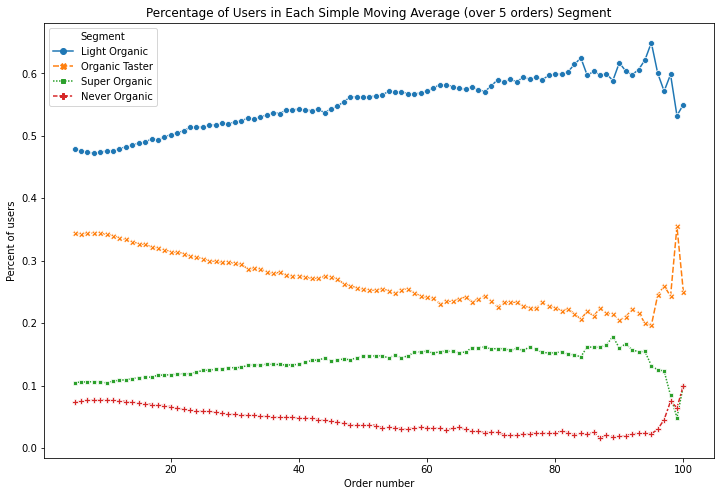

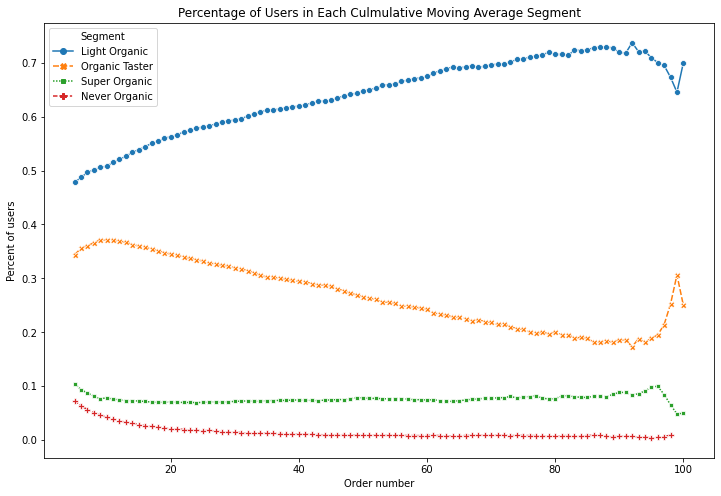

In [135]:
# Plot the percentage of users per order separated into the segments by a simple moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=plot_SMA5_df, x="order_number", y = '%_users', hue="segment_SMA5", style='segment_SMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Percentage of Users in Each Simple Moving Average (over 5 orders) Segment')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=plot_CMA5_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Percentage of Users in Each Culmulative Moving Average Segment')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass